# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANKModel import HANKModelClass

# Setup

In [2]:
model = HANKModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

# Test Household Problem

In [4]:
# just some ad hoc parameters
par.beta = 0.96**(1/4)
ss.ra = 1.02**(1/4)-1
ss.w = 1.0
ss.L = 1.0
ss.tau = 0.10
ss.chi = 0.0

In [5]:
model.solve_hh_ss(do_print=True)
model.simulate_hh_ss(do_print=True)

household problem in ss solved in 2.2 secs [1007 iterations]
household problem in ss simulated in 4.1 secs [1307 iterations]


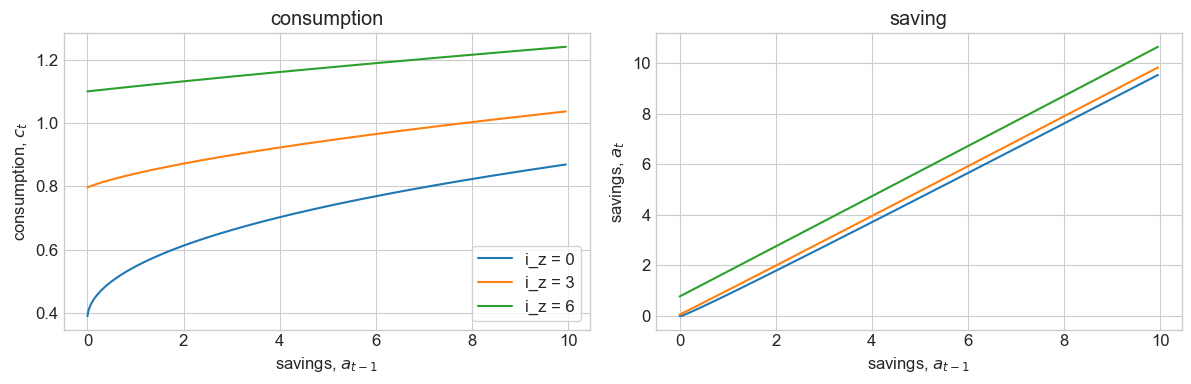

In [6]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 10

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.a[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings, $a_{t}$')

fig.tight_layout()

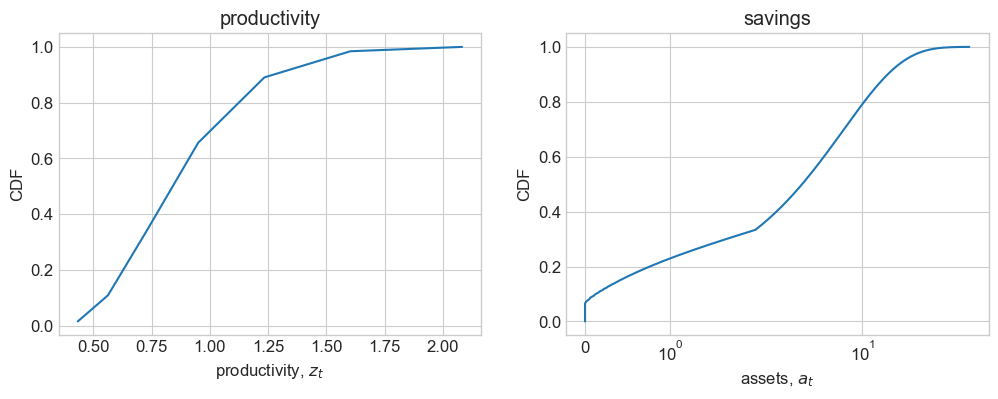

In [7]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('productivity')

y = np.cumsum(np.sum(ss.D[0],axis=1))
ax.plot(par.z_grid,y/y[-1])

ax.set_xlabel('productivity, $z_{t}$')
ax.set_ylabel('CDF')

# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('savings')
y = np.insert(np.cumsum(np.sum(ss.D[0],axis=0)),0,0.0)
ax.plot(np.insert(par.a_grid,0,par.a_grid[0]),y/y[-1])
        
ax.set_xlabel('assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

# Test household path

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.4 secs
household problem simulated along transition in 1.2 secs



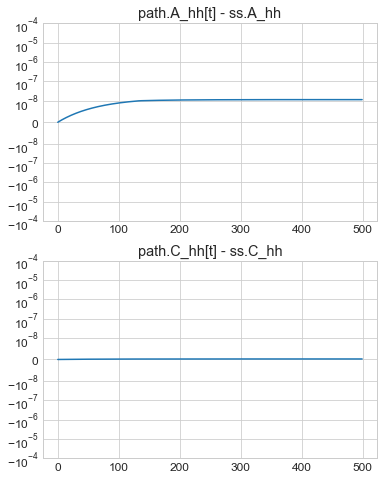

In [8]:
model.test_hh_path()

# Test steady state

In [9]:
from steady_state import obj_ss

In [10]:
beta_vec = np.linspace(0.85**(1/4),1/(1+par.r_target_ss)-1e-4,5)
clearing_A_vec = np.zeros(beta_vec.size)
for i,beta in enumerate(beta_vec):
    clearing_A_vec[i] = obj_ss(beta,model,do_print=False)
    print(f'{beta = :.2f} = {clearing_A_vec[i] = :.2f}')

beta = 0.96 = clearing_A_vec[i] = nan
beta = 0.97 = clearing_A_vec[i] = nan
beta = 0.98 = clearing_A_vec[i] = nan
beta = 0.99 = clearing_A_vec[i] = nan
beta = 0.99 = clearing_A_vec[i] = nan


In [11]:
model.find_ss(do_print=True)

steady state found in 0.0 secs
 r    =      nan
 q    =      nan
 qB   =      nan
Discrepancy in A =          nan
Discrepancy in Y =          nan


# Test path

In [12]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
chi            : t0 =  0.0e+00, max abs.  0.0e+00
L              : t0 =  0.0e+00, max abs.  0.0e+00
ra             : t0 =  0.0e+00, max abs.  0.0e+00
tau            : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  0.0e+00, max abs.  0.0e+00
A_hh           : t0 = -6.0e+00, max abs.  6.0e+00
C_hh           : t0 =  6.0e+00, max abs.  6.0e+00

absolute value (potential targets):
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
clearing_A     : t0 =  0.0e+00, max abs.  0.0e+00
clearing_Y     : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =      nan, max abs.      nan
Gamma          : t0 =      nan, max abs.      nan
i              : t0 =  0.0e+00, max abs.  0.0e+00
NKWC_res       : t0 =  0.0e+00, max abs.  0.0e+00
pi_w           : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, 

In [13]:
# model.test_jacs()

# Question 1

# Question 2

# Question 3

# Question 4